<a href="https://colab.research.google.com/github/thanhdaibl1572002/data-mining-project/blob/main/DATA_MINING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GIỚI THIỆU**
###**- Đề tài:** Dự đoán Tính Khả Dụng Tín Dụng Dựa trên Thông Tin Cá Nhân Khách Hàng.
###**- Phương pháp:** Random Forest.
###**- Nhãn dự đoán:** "Bad" hoặc "Good"
###**- Bộ dữ liệu:**: [Credit Card Approval Prediction](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)



#**IMPORT THƯ VIỆN**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#**TẢI BỘ DỮ LIỆU**

In [ ]:
! git clone 'https://github.com/thanhdaibl1572002/data-mining-project'

#**TỔNG QUAN DỮ LIỆU**

**- ID**: Mã số khách hàng

**- CODE_GENDER**: Giới tính

**- FLAG_OWN_CAR**: Có xe hơi không

**- FLAG_OWN_REALTY**: Có tài sản bất động sản không

**- CNT_CHILDREN**: Số lượng con cái

**- AMT_INCOME_TOTAL**: Thu nhập hàng năm

**- NAME_INCOME_TYPE**: Hạng mục thu nhập

**- NAME_EDUCATION_TYPE**: Cấp độ giáo dục

**- NAME_FAMILY_STATUS**: Tình trạng hôn nhân

**- NAME_HOUSING_TYPE**: Cách sống

**- DAYS_BIRTH**: Ngày sinh (Số ngày tính ngược từ ngày hiện tại, 0 là hôm nay, -1 là hôm qua)

**- DAYS_EMPLOYED**: Ngày bắt đầu làm việc (Số ngày tính ngược từ ngày hiện tại, 0 là ngày hiện tại, số dương là người đó hiện đang thất nghiệp)

**- FLAG_MOBIL**: Có điện thoại di động không

**- FLAG_WORK_PHONE**: Có điện thoại làm việc không

**- FLAG_PHONE**: Có điện thoại không

**- FLAG_EMAIL**: Có email không

**- OCCUPATION_TYPE**: Nghề nghiệp

**- CNT_FAM_MEMBERS**: Số lượng thành viên trong gia đình

##**Đọc bộ dữ liệu**

In [75]:
df = pd.read_csv('./data-mining-project/data.csv')

##**Thông tin tổng quan**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

##**Thống kê tổng quan**

In [40]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


##**Xem 10 dòng dữ liệu đầu tiên**

In [41]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


#**KHAI PHÁ DỮ LIỆU**

##**Kiểm tra dữ liệu thiếu**

In [42]:
missing_data = df.isnull().sum()
missing_data

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

##**Điền giá trị thiếu cho cột OCCUPATION_TYPE**

In [76]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('UnKnown')
missing_data = df.isnull().sum()
missing_data

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

##**Loại bỏ đặc trưng không cần thiết**

In [77]:
df.drop(columns=['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  OCCUPATION_TYPE      438557 non-null  object 
 12  CNT_FAM_MEMBERS      438557 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 43.5+ MB


##**Khai phá đặc trưng Numerical**

###**Xem các đặc trưng Numerical**

In [45]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS'],
      dtype='object')

###**Biểu đồ tần suất xuất hiện**

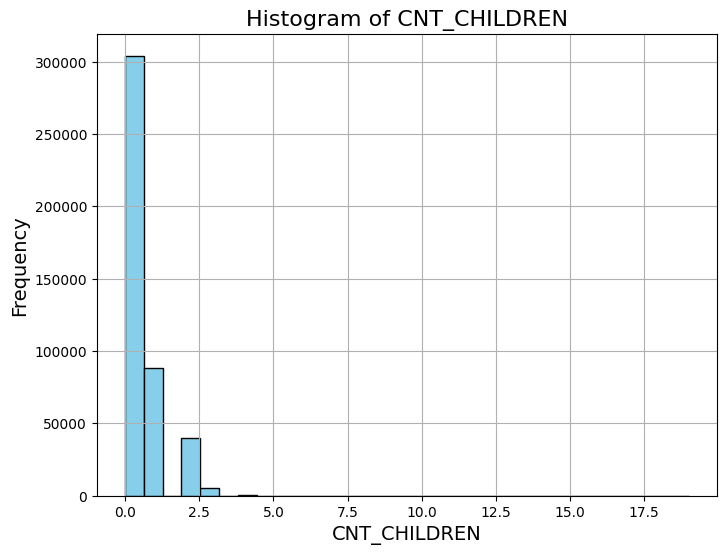

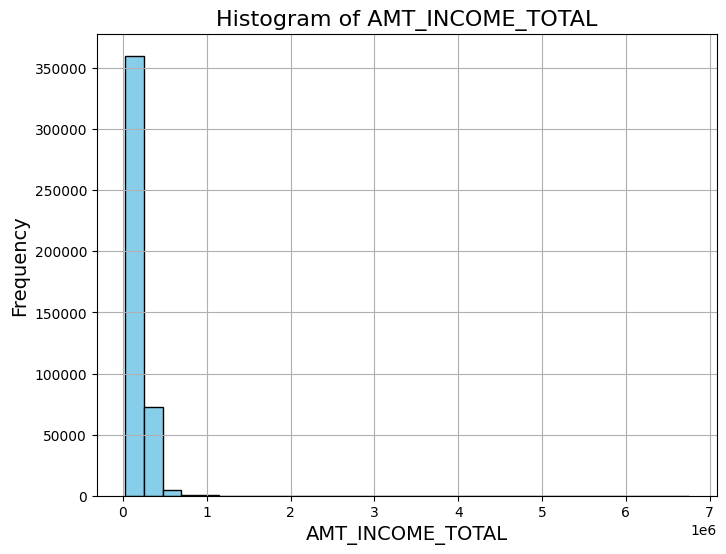

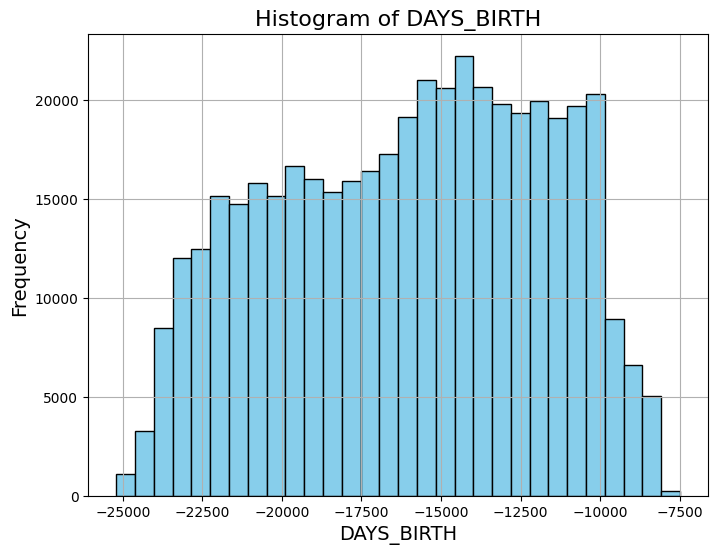

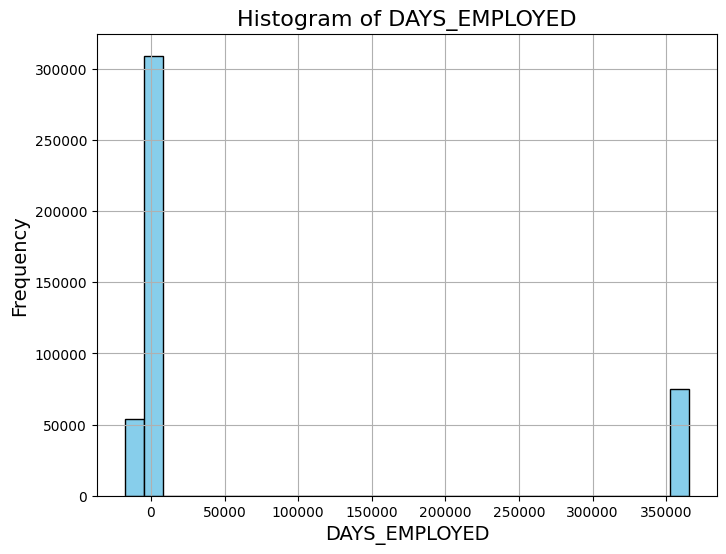

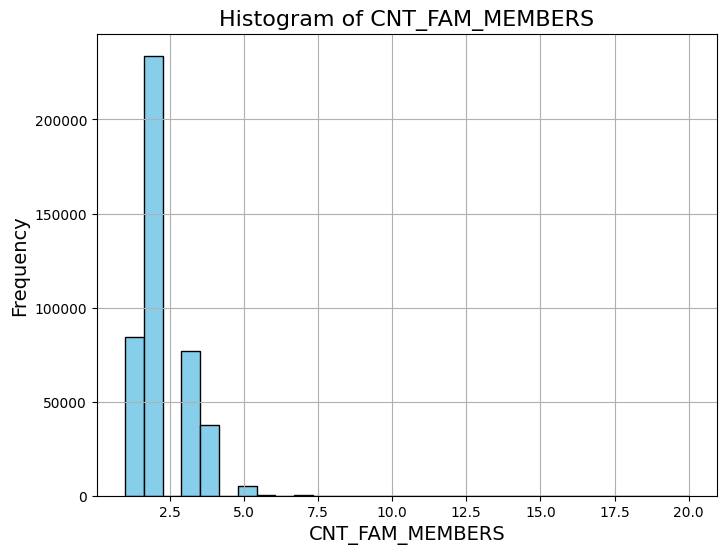

In [46]:
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {feature}', fontsize=16)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

###**Biểu đồ thể hiện ngoại lệ**

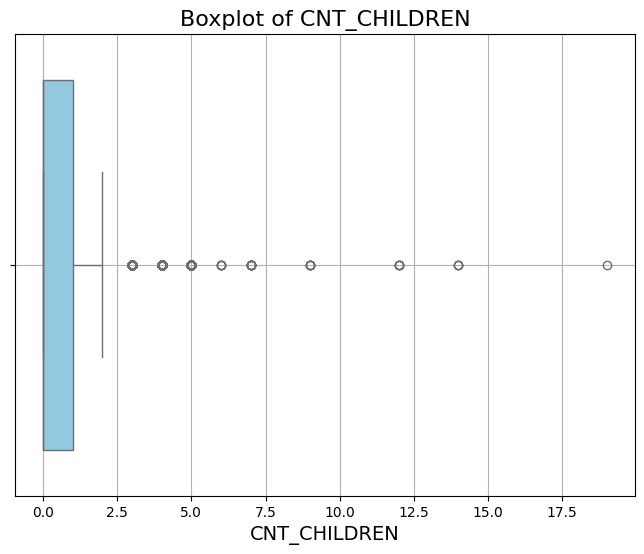

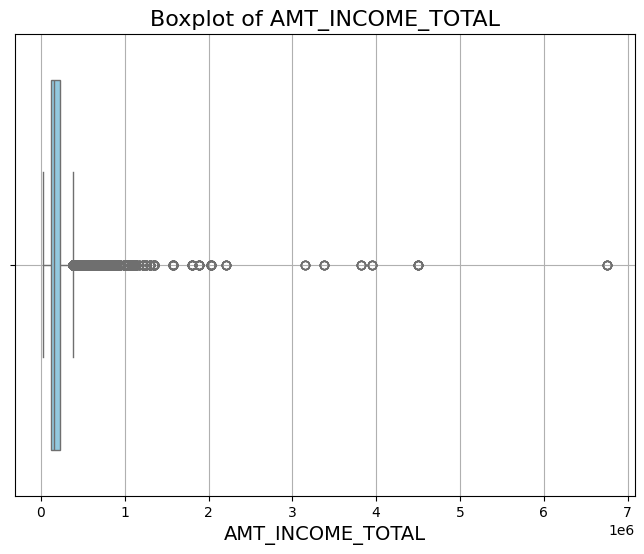

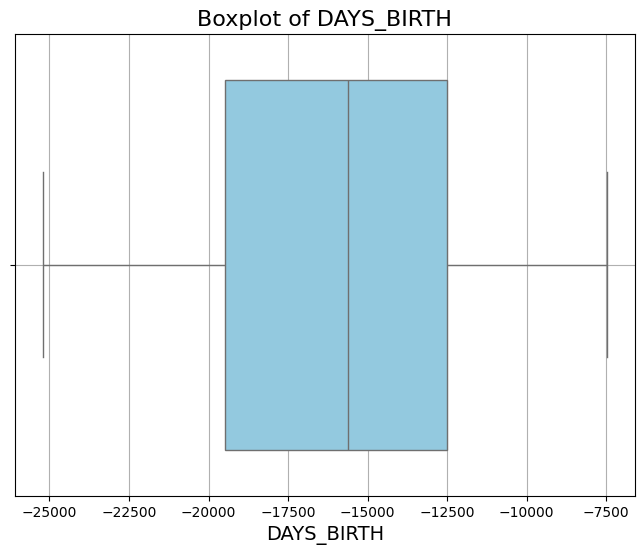

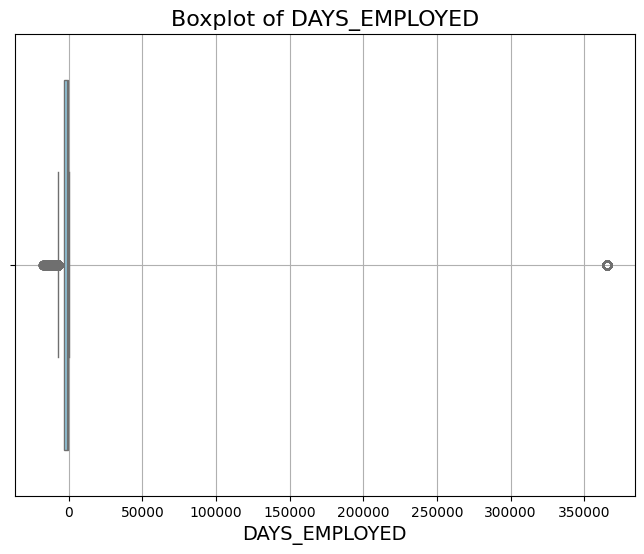

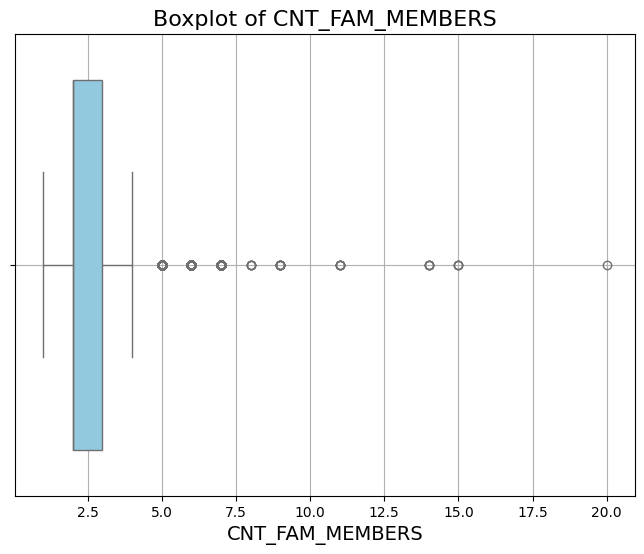

In [47]:
numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.grid(True)
    plt.show()

##**Khai phá đặc trưng Categorical**

###**Xem các đặc trưng Categorial**

In [48]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

###**Bảng tần suất xuất hiện**

In [49]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for feature in categorical_features:
    print(df[feature].value_counts())
    print('\n')

F    294440
M    144117
Name: CODE_GENDER, dtype: int64


N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64


Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64


House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

###**Biểu đồ thể hiện phân bố**

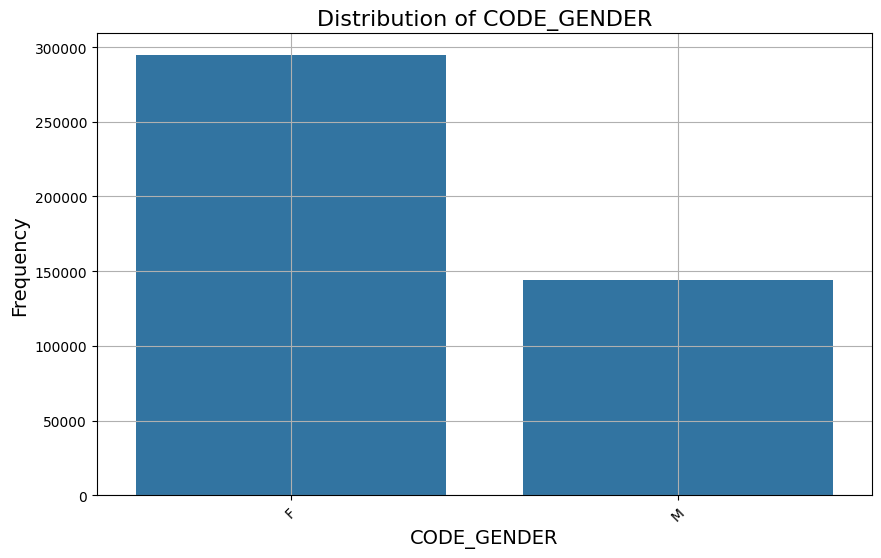

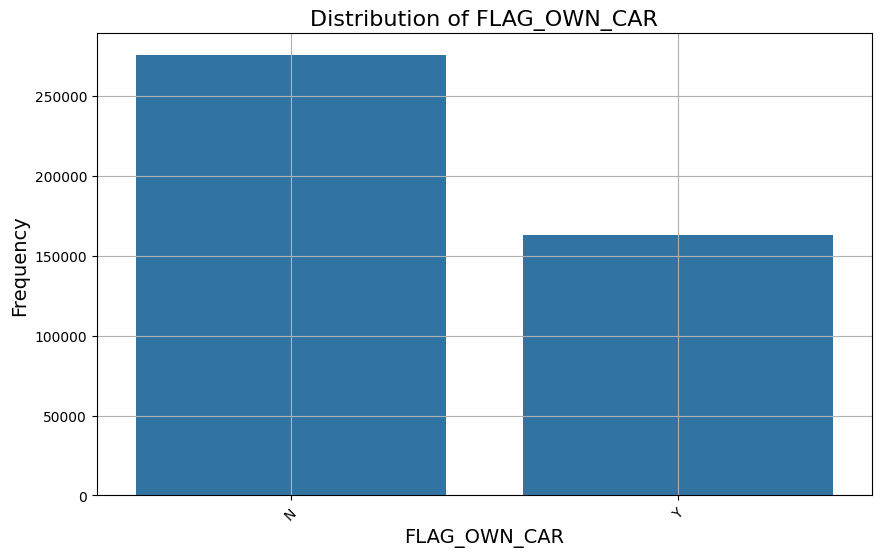

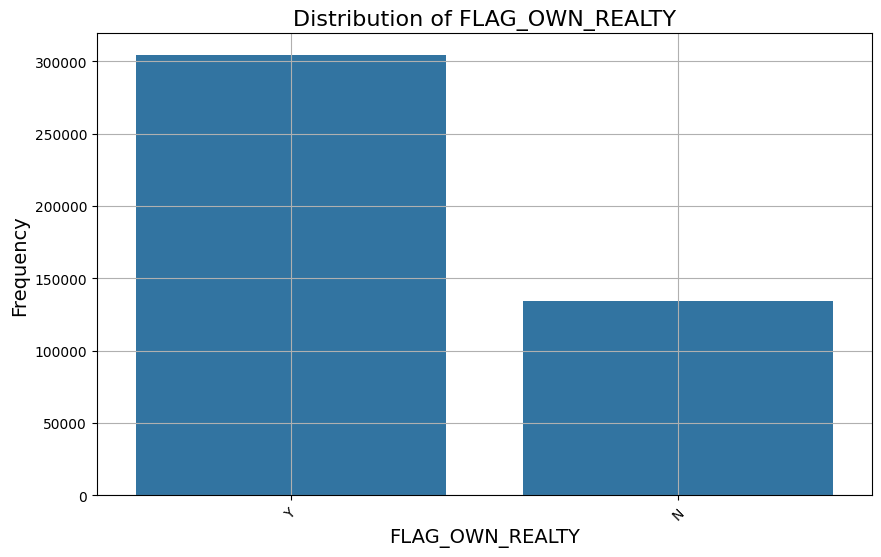

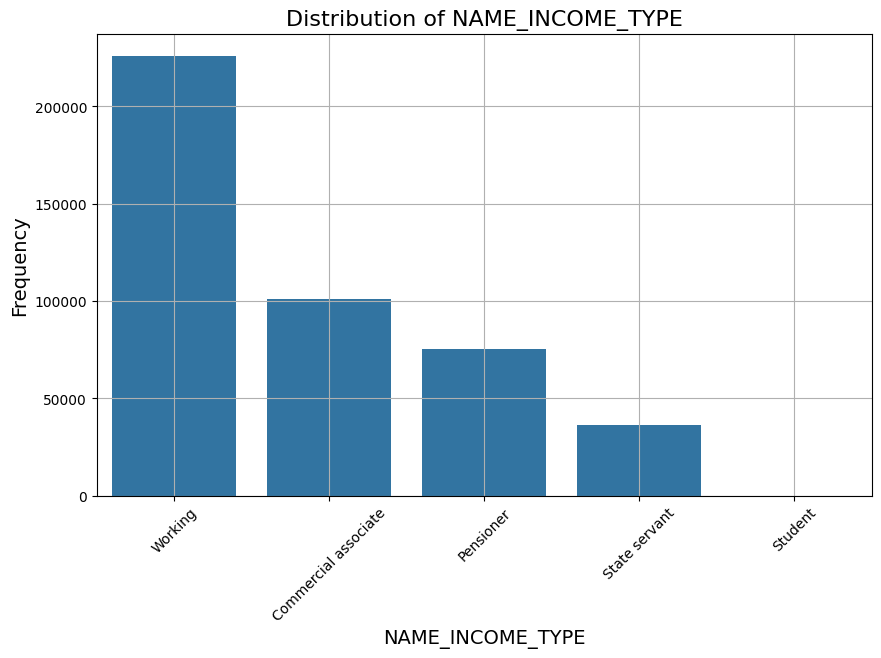

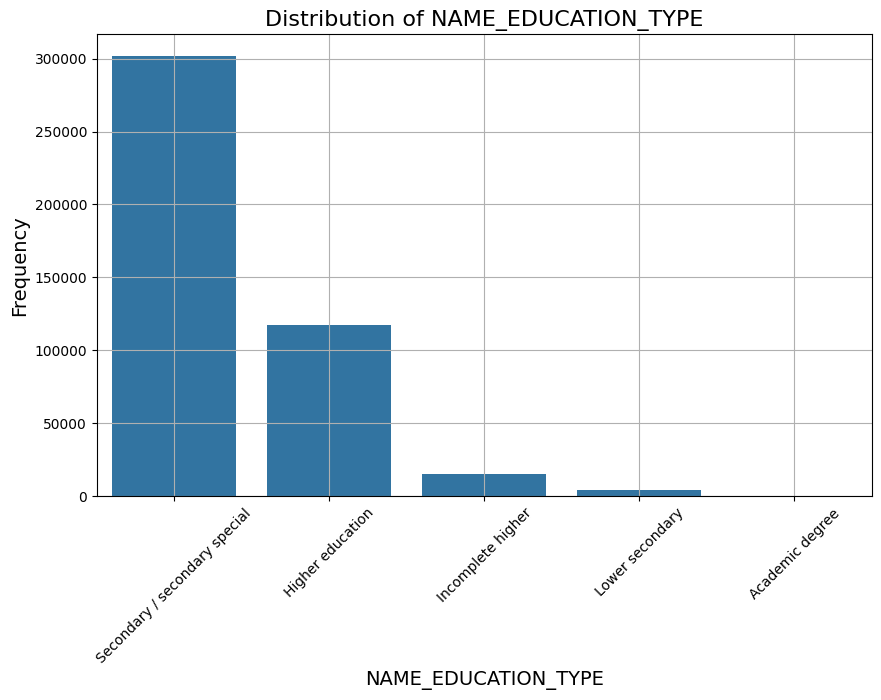

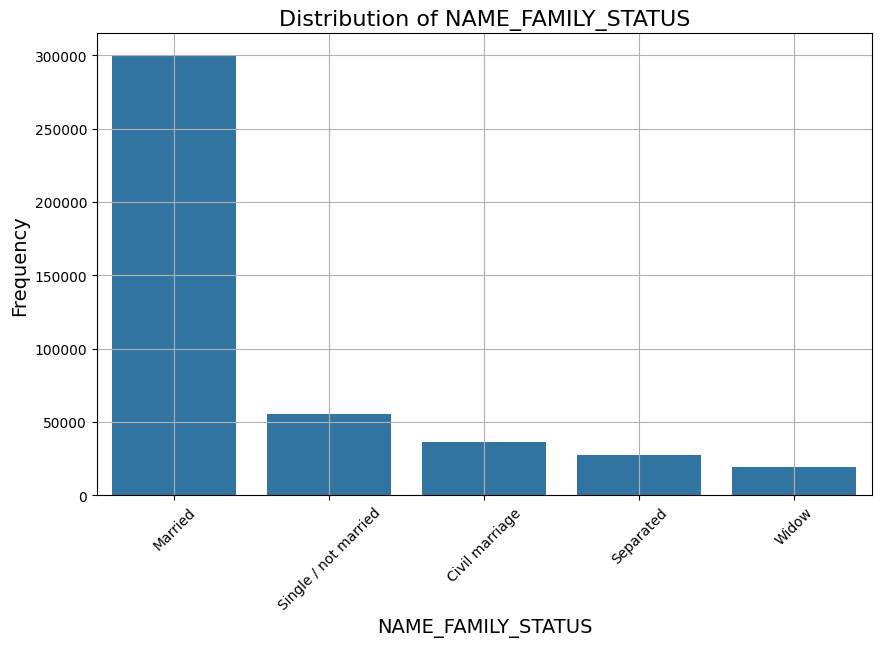

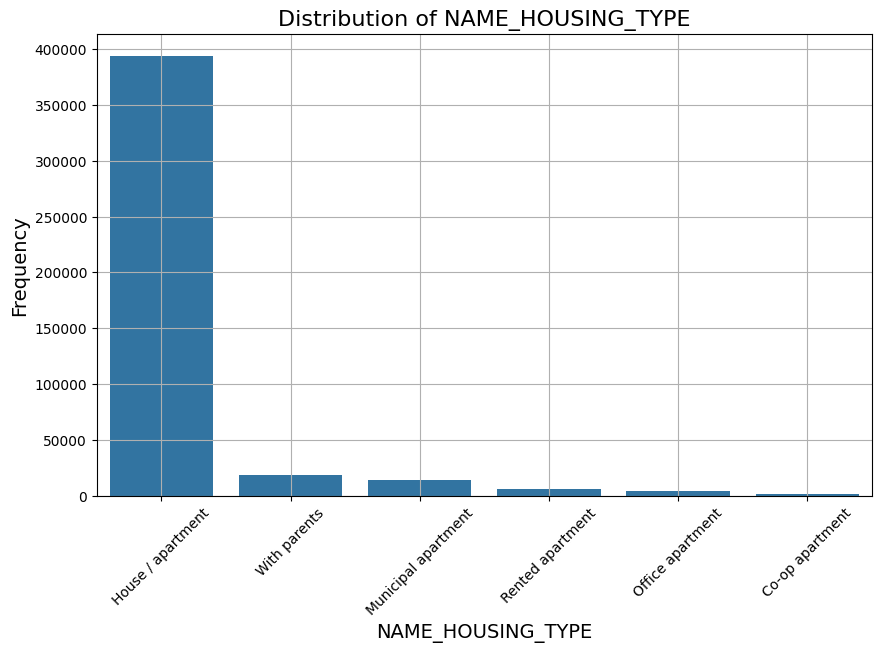

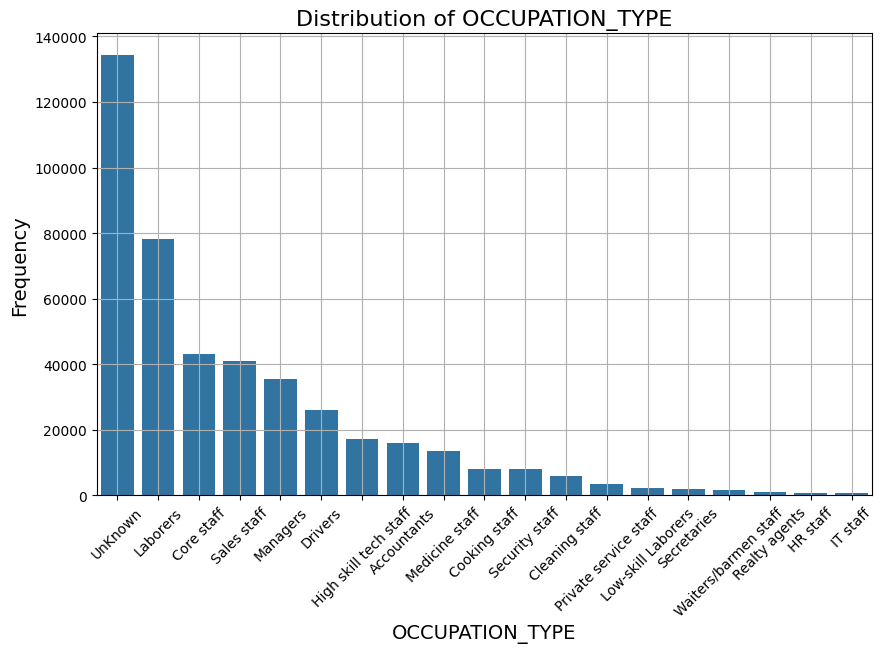

In [50]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#**TIỀN XỬ LÝ DỮ LIỆU**

##**Chuẩn hóa các đặc trưng numerical**

In [78]:
scaler = MinMaxScaler()

df[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH']] = scaler.fit_transform(df[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH']])

df.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,0.745032,0.033934,UnKnown,2.0
1,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,0.745032,0.033934,UnKnown,2.0
2,M,Y,Y,0,0.012850,Working,Secondary / secondary special,Married,House / apartment,0.210422,0.042837,Security staff,2.0
3,F,N,Y,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0
4,F,N,Y,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0
5,F,N,Y,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0
6,F,N,Y,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0
7,F,N,Y,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0
8,F,N,Y,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0
9,F,N,Y,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0


##**Mã hóa One-hot cho các đặc trưng nhị phân**

In [83]:
columns_to_encode = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

one_hot_encoder = OneHotEncoder(drop=None, sparse=False)

encoded_data = one_hot_encoder.fit_transform(df[columns_to_encode])
df_encoded = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df, df_encoded], axis=1)

df = df.drop(columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,0.745032,0.033934,UnKnown,2.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,0.745032,0.033934,UnKnown,2.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0,0.012850,Working,Secondary / secondary special,Married,House / apartment,0.210422,0.042837,Security staff,2.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,0,0.036274,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.343891,0.037829,Sales staff,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0,0.038281,Pensioner,Higher education,Separated,House / apartment,0.154528,1.000000,UnKnown,1.0,1.0,0.0,1.0,0.0,0.0,1.0


##**Mã hóa nhãn cho các đặc trưng caterical**

In [84]:
label_encoder = LabelEncoder()

for column in ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']:
  df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,0,0.059697,4,1,0,4,0.745032,0.033934,17,2.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0,0.059697,4,1,0,4,0.745032,0.033934,17,2.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0,0.012850,4,4,1,1,0.210422,0.042837,16,2.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,0.036274,0,4,3,1,0.343891,0.037829,14,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,0.036274,0,4,3,1,0.343891,0.037829,14,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0,0.036274,0,4,3,1,0.343891,0.037829,14,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,0,0.036274,0,4,3,1,0.343891,0.037829,14,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0,0.038281,1,1,2,1,0.154528,1.000000,17,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8,0,0.038281,1,1,2,1,0.154528,1.000000,17,1.0,1.0,0.0,1.0,0.0,0.0,1.0
9,0,0.038281,1,1,2,1,0.154528,1.000000,17,1.0,1.0,0.0,1.0,0.0,0.0,1.0


##**Chia dữ liệu huấn luyện**

#**HUẤN LUYỆN**

#**ĐÁNH GIÁ**

#**TINH CHỈNH**

#**THỬ NGHIỆM**